In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTE DE BIBLIOTECAS, MODULOS Y FUNCIONES NECESARIAS**

In [89]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import resample, shuffle
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

**LECTURA, LIMPIEZA Y PREPARACIÓN DE DATOS**

(14640, 2)


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

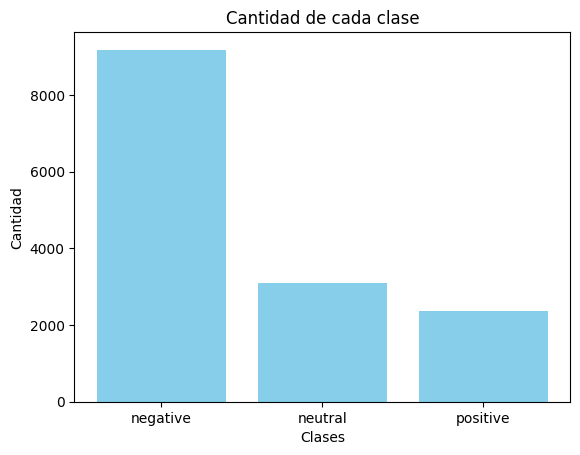

In [90]:
#Leemos el csv y nos quedamos con los sentimientos y los comentarios que es lo que nos interesa para el ejercicio
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tweets (1).csv')
df=df[['airline_sentiment','text']]

#Graficamos la cantidad de datos de cada sentimiento para ver si es necesario balancear las clases
# Calcular la cantidad de cada clase
conteo_clases = df['airline_sentiment'].value_counts()

# Crear el gráfico de barras
plt.bar(conteo_clases.index, conteo_clases.values, color='skyblue')

plt.xlabel('Clases')
plt.ylabel('Cantidad')
plt.title('Cantidad de cada clase')
#Nos damos que cuenta que hay que balancear clases pero aun asi vamos a probar con todos los datos que por la cantidad de datos es mejor

#Creamos las listas textos y etiquetas con los valores de text y airline_sentiment respectivamente
texts=df['text'].values
labels=df['airline_sentiment'].values

#Vamos a utilizar LabelEncoder para convertir etiquetas a números y asi aplicar codificacion one hot a estos
label_encoder = LabelEncoder()
print(df.shape)

# Convertimos las etiquetas a números
encoded_data = label_encoder.fit_transform(labels)

# Convertimos los números a representación one-hot
labels = to_categorical(encoded_data)
labels

Ahora vamos a tokenizar los textos, ajustar la longitud de las secuencias, preparar las etiquetas en un formato adecuado para el modelo y dividir los datos en conjuntos de entrenamiento, validación y prueba.

In [91]:
# Tamaño de la secuencia de tokens
maxlen = 100

# Número de secuencias que se van a utilizar para entrenar a la red
training_samples = 10000

# Número de secuencias que se van a utilizar para validar la red
validation_samples = 2640

# Número máximo de palabras a considerar (se seleccionarán las palabras más frecuentes)
max_words = 20000

# TOKENIZACION
# Creamos un objeto Tokenizer especificando el número máximo de palabras a tokenizar (num_words).
# Este objeto se va a utilizar para convertir texto en secuencias de números enteros.
tokenizer = Tokenizer(num_words=max_words)

# Utilizamos fit_on_texts para ajusta el Tokenizer a los textos ('texts').
tokenizer.fit_on_texts(texts)

# Con texts_to_sequences convertimos las secuencias de texto del Tokenizer ajustado a secuencias de números enteros.
sequences = tokenizer.texts_to_sequences(texts)

# word_index contiene el mapeo de palabras a índices.
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

#AJUSTAR LONGITUD DE LAS SECUENCIAS
# Aseguramos que todas las secuencias tengan la misma longitud con Pad sequences. De esta forma si la secuencia por ejemplo tiene 3 palabras/tokens y antes era de esta forma [1,45,23],
# ahora sera [0,0,0..1,45,23] que es una vector de tamaño 1xmaxlen, o si la secuencia tiene 5 palabras/tokens y antes era [10,54,103,4,35], ahora sera [0,0...10,54,103,4,35] de tamaño 1xmaxlen.
# Esto es necesario ya que no es posible entrenar una red con secuencias de distintos tamaños y además no influye en nada ya que podemos indicarle a la red que pase de los ceros.
data = pad_sequences(sequences, maxlen=maxlen)

#REFORMATEAR ETIQUETAS
# Convertir las etiquetas a un formato adecuado para el modelo
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

#DIVISION DE DATOS
# Mezclar y dividir los datos en conjuntos de entrenamiento, validación y prueba
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels2 = labels[indices]
sequences=np.array(sequences)[indices]

# Conjunto de entrenamiento
x_train = data[:training_samples]
y_train = labels2[:training_samples]

# Conjunto de validación
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels2[training_samples: training_samples + validation_samples]

# Conjunto de prueba
x_test = data[training_samples + validation_samples:]
y_test = labels2[training_samples + validation_samples:]
x_test

Found 15768 unique tokens.
Shape of data tensor: (14640, 100)
Shape of label tensor: (14640, 3)


<ipython-input-91-4f20770dcabb>:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sequences=np.array(sequences)[indices]


array([[   0,    0,    0, ...,    1,   21,  164],
       [   0,    0,    0, ...,    2,  547,  468],
       [   0,    0,    0, ...,  168,   11,  268],
       ...,
       [   0,    0,    0, ...,   29,   14, 2943],
       [   0,    0,    0, ...,   66,   10, 2217],
       [   0,    0,    0, ...,    7,  728,  215]], dtype=int32)

In [92]:
sequences[10]

[13,
 39,
 187,
 60,
 1,
 133,
 1125,
 120,
 270,
 913,
 15,
 73,
 25,
 69,
 2,
 241,
 173,
 267,
 190,
 335]

In [93]:
x_train[10]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,   13,   39,  187,   60,    1,  133, 1125,  120,
        270,  913,   15,   73,   25,   69,    2,  241,  173,  267,  190,
        335], dtype=int32)

**CREACIÓN DE LA RED**

In [94]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN, Dropout, LSTM,BatchNormalization

# Crear un modelo secuencial
model = Sequential()

# Capa de Embedding: transforma secuencias de índices en secuencia de vectores densos, es decir por cada indice de la secuencia crea un vector(embedding)
# en este caso de 500 dimensiones (1x500), y como input_length que es la longitud de las secuencias (maxlen) es 100 el resultado sera una matriz 100x300
# max_words es el número máximo de palabras que considera el Tokenizer.
model.add(Embedding(max_words, 500, input_length=maxlen))

# Capa LSTM: red recurrente de tipo LSTM con 128 unidades, devuelve todos los estados
model.add(LSTM(128, return_sequences=True))
# Capa LSTM adicional con 128 unidades, devuelve todos los estados
model.add(LSTM(128, return_sequences=True))

# Capa Dropout: apaga aleatoriamente un porcentaje de unidades durante el entrenamiento para prevenir el sobreajuste
model.add(Dropout(0.2))

# Otras dos capas LSTM con 128 unidades y que devuelven todos los estados
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
# Última capa LSTM con 128 unidades, solo devuelve el ultimo estado (se usa para la última capa LSTM)
model.add(LSTM(128))

# Capa densa con 3 unidades y función de activación softmax ya que se trata de problema de clasificacion en 3 clases
model.add(Dense(3, activation='softmax'))

# Resumen del modelo, que muestra la arquitectura y el número de parámetros entrenables
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 500)          10000000  
                                                                 
 lstm_15 (LSTM)              (None, 100, 128)          322048    
                                                                 
 lstm_16 (LSTM)              (None, 100, 128)          131584    
                                                                 
 dropout_3 (Dropout)         (None, 100, 128)          0         
                                                                 
 lstm_17 (LSTM)              (None, 100, 128)          131584    
                                                                 
 lstm_18 (LSTM)              (None, 100, 128)          131584    
                                                                 
 lstm_19 (LSTM)              (None, 128)              

**ENTRENAMIENTO Y EVALUACION DE LA RED**

In [95]:
#Compilamos el modelo utilizando adam como optimizador y categorical_crossentropy como funcion de pérdida ya que se trata de un problema de clasificacion en 3 clases
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
#Entrenamos el modelo durante 10 epocas en lotes de 200 y utilizando (x_val, y_val) como datos de validacion
history = model.fit(x_train, y_train, epochs=5, batch_size=200, validation_data=(x_val, y_val))

Epoch 1/5
50/50 [==============================] - 20s 263ms/step - loss: 0.8375 - acc: 0.6353 - val_loss: 0.7022 - val_acc: 0.6886
Epoch 2/5
50/50 [==============================] - 8s 155ms/step - loss: 0.6104 - acc: 0.7164 - val_loss: 0.6543 - val_acc: 0.7095
Epoch 3/5
50/50 [==============================] - 9s 177ms/step - loss: 0.4782 - acc: 0.7841 - val_loss: 0.6822 - val_acc: 0.7295
Epoch 4/5
50/50 [==============================] - 4s 78ms/step - loss: 0.3529 - acc: 0.8656 - val_loss: 0.6338 - val_acc: 0.7716
Epoch 5/5
50/50 [==============================] - 5s 92ms/step - loss: 0.2312 - acc: 0.9203 - val_loss: 0.7061 - val_acc: 0.7716


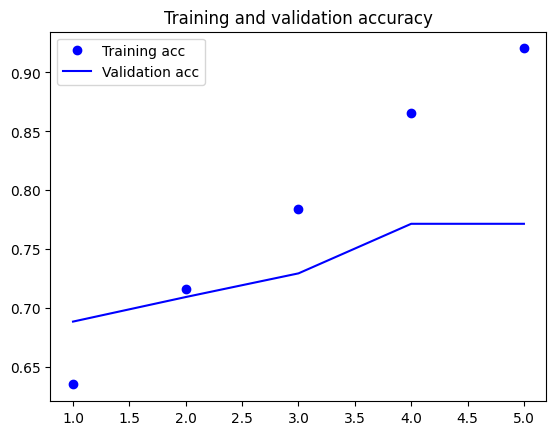

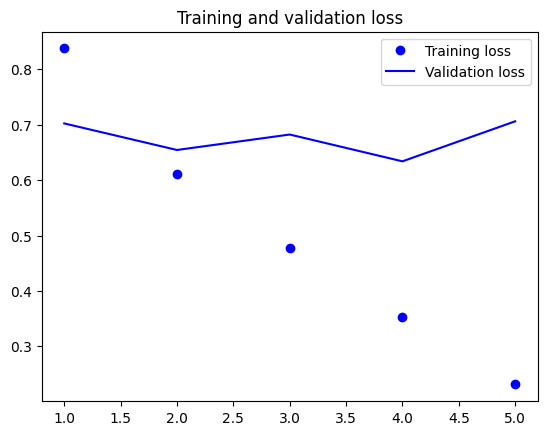

In [96]:
import matplotlib.pyplot as plt

#Graficamos la accuracy y loss a lo largo de las epochs durante el entrenamiento y la validación para comprobar si se produce overfitting o underfitting

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [97]:
#Evaluar el modelo en x_test
model.evaluate(x_test, y_test)

63/63 [==============================] - 1s 15ms/step - loss: 0.6899 - acc: 0.7755


[0.6898792386054993, 0.7754999995231628]

**OTRAS FORMAS DE PREPARAR LOS DATOS, NUEVA RED PARA ESTOS DATOS Y LA CALIDAD DE SUS PREDICCIONES**

La técnica de representación del lenguaje "bag-of-words" (BoW) convierte una lista de textos en una matriz numérica, donde cada fila representa un texto y cada columna representa una palabra del vocabulario. La matriz resultante se llama "matriz de términos de documento".

Para crear esta matriz, se cuenta, para cada texto en la lista de textos, cuántas veces aparece cada palabra del vocabulario en ese texto.
Por tanto, la matriz resultante, tiene una fila por cada texto y una columna por cada palabra en el vocabulario y cada elemento de la matriz representa la frecuencia de la palabra correspondiente en el texto asociado.

Se pueden aplicar técnicas adicionales, como la ponderación TF-IDF (Term Frequency-Inverse Document Frequency), que le asigna a cada término un peso que refleja su importancia relativa en el conjunto de documentos.

En resumen, la técnica de "bag-of-words" convierte la información semántica y estructural de los textos en una representación numérica que puede ser utilizada por algoritmos de aprendizaje automático. Sin embargo, esta representación no tiene en cuenta el orden de las palabras en los textos ni las relaciones semánticas entre ellas; simplemente se centra en la frecuencia (o ponderación) de las palabras en los documentos.

In [98]:
#BAG-OF-WORDS
# Crear un objeto CountVectorizer
vectorizer = CountVectorizer()

# # Ajustar el vectorizer al conjunto de entrenamiento y transformar los texto en una matriz BoW
x_train_bow = vectorizer.fit_transform(texts[:training_samples])
x_train_bow = x_train_bow.toarray()
x_val_bow = vectorizer.transform(texts[training_samples: training_samples + validation_samples])
x_val_bow = x_val_bow.toarray()
x_test_bow = vectorizer.transform(texts[training_samples + validation_samples:])
x_test_bow = x_test_bow.toarray()

print('Shape of BoW matrix for training:', x_train_bow.shape)

Shape of BoW matrix for training: (10000, 12318)


In [99]:
#TF-IDF
# Crear un objeto TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()

# Ajustar el vectorizer al conjunto de entrenamiento y transformar el texto
x_train_tfidf = vectorizer_tfidf.fit_transform(texts[:training_samples])
x_train_tfidf = x_train_tfidf.toarray()
x_val_tfidf = vectorizer_tfidf.transform(texts[training_samples: training_samples + validation_samples])
x_val_tfidf = x_val_tfidf.toarray()
x_test_tfidf = vectorizer_tfidf.transform(texts[training_samples + validation_samples:])
x_test_tfidf = x_test_tfidf.toarray()

print('Shape of BoW matrix for training:', x_val_tfidf.shape)

Shape of BoW matrix for training: (2640, 12318)


In [100]:
# Crear un modelo secuencial
model2 = Sequential()

model2.add(Dense(6, activation='relu', input_dim=x_train_bow.shape[1]))
model2.add(Dense(3, activation='softmax'))

# Resumen del modelo
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 73914     
                                                                 
 dense_13 (Dense)            (None, 3)                 21        
                                                                 
Total params: 73935 (288.81 KB)
Trainable params: 73935 (288.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history2 = model2.fit(x_train_bow, y_train, epochs=5, batch_size=200, validation_data=(x_val_bow, y_val))

Epoch 1/5
50/50 [==============================] - 2s 33ms/step - loss: 1.0865 - acc: 0.5696 - val_loss: 1.0712 - val_acc: 0.6242
Epoch 2/5
50/50 [==============================] - 1s 21ms/step - loss: 1.0584 - acc: 0.6258 - val_loss: 1.0468 - val_acc: 0.6242
Epoch 3/5
50/50 [==============================] - 1s 20ms/step - loss: 1.0321 - acc: 0.6263 - val_loss: 1.0184 - val_acc: 0.6242
Epoch 4/5
50/50 [==============================] - 1s 23ms/step - loss: 0.9900 - acc: 0.6271 - val_loss: 0.9727 - val_acc: 0.6242
Epoch 5/5
50/50 [==============================] - 1s 23ms/step - loss: 0.9430 - acc: 0.6265 - val_loss: 0.9429 - val_acc: 0.6242


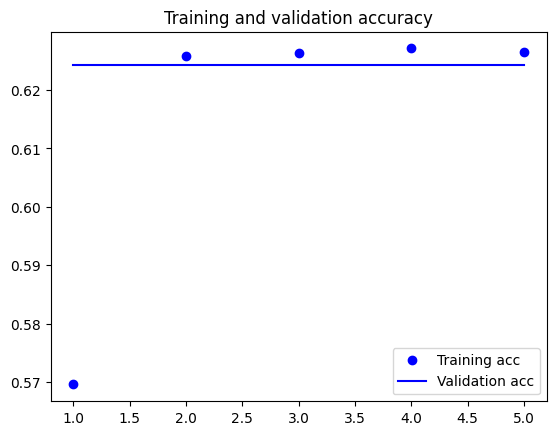

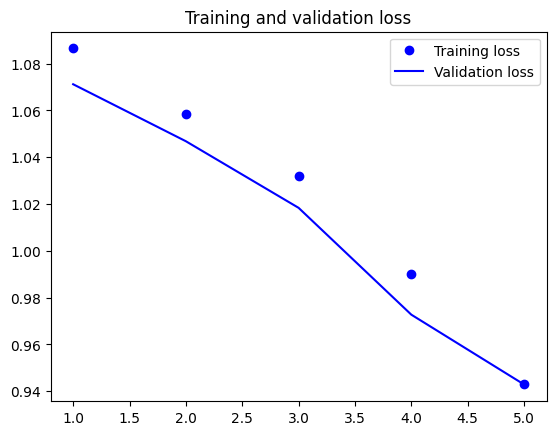

In [102]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [103]:
model2.evaluate(x_test_bow, y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.9410 - acc: 0.6360


[0.9409740567207336, 0.6359999775886536]

In [104]:
history3 = model2.fit(x_train_tfidf, y_train, epochs=5, batch_size=200, validation_data=(x_val_tfidf, y_val))

Epoch 1/5
50/50 [==============================] - 1s 25ms/step - loss: 0.9469 - acc: 0.6258 - val_loss: 0.9442 - val_acc: 0.6242
Epoch 2/5
50/50 [==============================] - 1s 15ms/step - loss: 0.9248 - acc: 0.6258 - val_loss: 0.9301 - val_acc: 0.6242
Epoch 3/5
50/50 [==============================] - 1s 13ms/step - loss: 0.9086 - acc: 0.6258 - val_loss: 0.9233 - val_acc: 0.6242
Epoch 4/5
50/50 [==============================] - 1s 14ms/step - loss: 0.8931 - acc: 0.6258 - val_loss: 0.9207 - val_acc: 0.6242
Epoch 5/5
50/50 [==============================] - 0s 10ms/step - loss: 0.8726 - acc: 0.6260 - val_loss: 0.9214 - val_acc: 0.6242


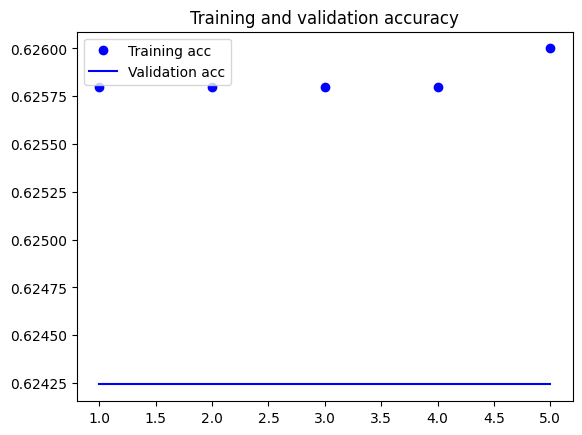

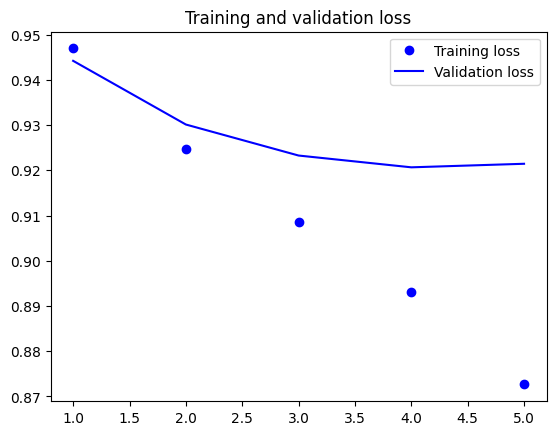

In [105]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [106]:
model2.evaluate(x_test_tfidf, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.9124 - acc: 0.6360


[0.912394106388092, 0.6359999775886536]

**EMBEDDINGS PREENTRENADOS Y COMO USARLOS**

In [107]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
import nltk
import os

# Descargar el recurso "punkt"
nltk.download('punkt')

#WORD2VEC
#Crear columna con textos tokenizados con word_tokenize
df['tokenized_text'] = df['text'].apply(word_tokenize)

#Entrenar modelo Word2Vec con textos tokenizados para obtener matriz de embeddings
#(es decir convertir cada token en embedding en este caso de 300 dimensiones)en la siguiente celda
model_w2v = Word2Vec(sentences=df['tokenized_text'], vector_size=300, window=5, min_count=1, workers=4)

#GLOBE
#Cargar los datos de globe para obtener matriz de embeddings en la siguiente celda
glove_dir = '/content/drive/MyDrive/Colab Notebooks'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d(1).txt'),  encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Found 400001 word vectors.


In [108]:
from sklearn.model_selection import train_test_split

#WORD2VEC
# Tamaño del vocabulario y dimensión de embeddings para Word2Vec
vocab_size_w2v = len(model_w2v.wv.key_to_index)
print(vocab_size_w2v)
embedding_dim_w2v = model_w2v.vector_size
print(embedding_dim_w2v)


# Inicializar la matriz de embeddings con ceros
embedding_matrix_w2v = np.zeros((vocab_size_w2v, embedding_dim_w2v))

# Llenar la matriz con los vectores de embedding correspondientes
for word, index in model_w2v.wv.key_to_index.items():
    embedding_matrix_w2v[index] = model_w2v.wv[word]
print(embedding_matrix_w2v)

#GLOBE
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

19872
300
[[-4.05583620e-01  2.80154735e-01  2.69286662e-01 ... -4.54472393e-01
   2.26075456e-01 -2.81787217e-01]
 [ 6.94802031e-02  3.76044601e-01 -6.74747080e-02 ... -3.25850576e-01
   2.69185245e-01 -2.06520706e-01]
 [-1.67527169e-01 -3.65710497e-01 -2.60937065e-02 ... -6.68466836e-02
   5.21392465e-01  1.71163186e-01]
 ...
 [-1.46606658e-03  7.56027875e-03 -1.66852819e-03 ... -2.76826788e-03
   5.41655580e-03 -1.08227937e-03]
 [-8.48521711e-04  7.01460661e-03  5.52312587e-04 ...  1.17286120e-03
   4.96166432e-03 -5.05192531e-03]
 [ 3.50674079e-03  8.74760188e-03 -4.84801829e-04 ... -1.29963625e-02
   6.00279495e-03 -6.76727621e-03]]


In [109]:
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D

# Crear modelo para Word2Vec
model_w2v = Sequential()
model_w2v.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_w2v.add(LSTM(128, return_sequences=True))
model_w2v.add(LSTM(64, return_sequences=True))
model_w2v.add(LSTM(32, return_sequences=True))
model_w2v.add(LSTM(32))
model_w2v.add(Dense(3, activation='softmax'))

model_w2v.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          2000000   
                                                                 
 lstm_20 (LSTM)              (None, 100, 128)          117248    
                                                                 
 lstm_21 (LSTM)              (None, 100, 64)           49408     
                                                                 
 lstm_22 (LSTM)              (None, 100, 32)           12416     
                                                                 
 lstm_23 (LSTM)              (None, 32)                8320      
                                                                 
 dense_14 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2187491 (8.34 MB)
Trainable params: 218

In [110]:
# model_w2v.layers[0] se refiere a la primera capa del modelo, que es la capa de embedding en este caso.

# Establecer los pesos de la capa de embedding con la matriz de embeddings preentrenados.
model_w2v.layers[0].set_weights([embedding_matrix])

# Establecer trainable a False para congelar la capa y evitar que sus pesos se actualicen durante el entrenamiento.
model_w2v.layers[0].trainable = False

In [111]:
model_w2v.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history4 = model_w2v.fit(x_train, y_train, epochs=20, batch_size=200, validation_data=(x_val,y_val))

Epoch 1/20
50/50 [==============================] - 12s 78ms/step - loss: 0.8222 - accuracy: 0.6372 - val_loss: 0.7519 - val_accuracy: 0.6924
Epoch 2/20
50/50 [==============================] - 2s 32ms/step - loss: 0.7031 - accuracy: 0.7098 - val_loss: 0.6812 - val_accuracy: 0.7167
Epoch 3/20
50/50 [==============================] - 1s 28ms/step - loss: 0.6399 - accuracy: 0.7403 - val_loss: 0.6374 - val_accuracy: 0.7360
Epoch 4/20
50/50 [==============================] - 1s 28ms/step - loss: 0.6126 - accuracy: 0.7518 - val_loss: 0.6244 - val_accuracy: 0.7409
Epoch 5/20
50/50 [==============================] - 1s 29ms/step - loss: 0.5652 - accuracy: 0.7722 - val_loss: 0.6021 - val_accuracy: 0.7530
Epoch 6/20
50/50 [==============================] - 2s 34ms/step - loss: 0.5388 - accuracy: 0.7845 - val_loss: 0.5753 - val_accuracy: 0.7621
Epoch 7/20
50/50 [==============================] - 2s 40ms/step - loss: 0.5115 - accuracy: 0.7939 - val_loss: 0.5871 - val_accuracy: 0.7614
Epoch 8/20
5

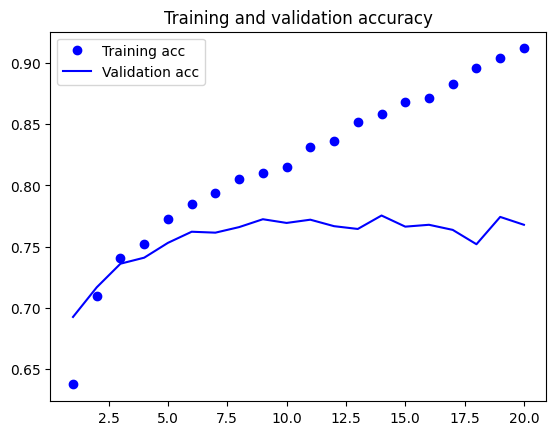

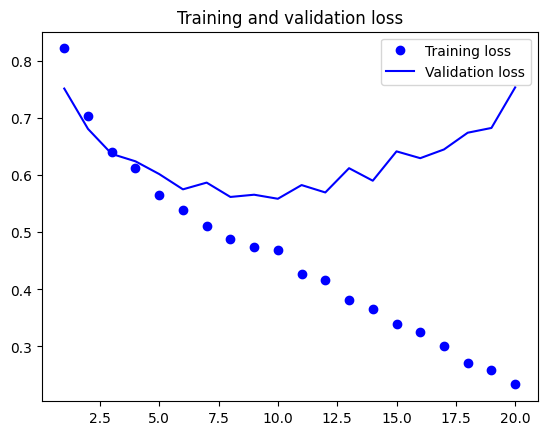

In [112]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [113]:
model_w2v.evaluate(x_test, y_test)

63/63 [==============================] - 1s 11ms/step - loss: 0.7456 - accuracy: 0.7705


[0.7456297278404236, 0.7705000042915344]

In [114]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN

#Crear modelo para globe
model_globe = Sequential()
model_globe.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_globe.add(LSTM(256, return_sequences=True))
model_globe.add(LSTM(128, return_sequences=True))
model_globe.add(LSTM(32, return_sequences=True))
model_globe.add(LSTM(32))
model_globe.add(Dense(3, activation='softmax'))
model_globe.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          2000000   
                                                                 
 lstm_24 (LSTM)              (None, 100, 256)          365568    
                                                                 
 lstm_25 (LSTM)              (None, 100, 128)          197120    
                                                                 
 lstm_26 (LSTM)              (None, 100, 32)           20608     
                                                                 
 lstm_27 (LSTM)              (None, 32)                8320      
                                                                 
 dense_15 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2591715 (9.89 MB)
Trainable params: 259

In [115]:
model_globe.layers[0].set_weights([embedding_matrix])
model_globe.layers[0].trainable = False

In [116]:
model_globe.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history5 = model_globe.fit(x_train, y_train, epochs=10, batch_size=200, validation_data=(x_val,y_val))

Epoch 1/10
50/50 [==============================] - 11s 72ms/step - loss: 0.8204 - accuracy: 0.6432 - val_loss: 0.8244 - val_accuracy: 0.6345
Epoch 2/10
50/50 [==============================] - 2s 45ms/step - loss: 0.6940 - accuracy: 0.7135 - val_loss: 0.6700 - val_accuracy: 0.7117
Epoch 3/10
50/50 [==============================] - 2s 48ms/step - loss: 0.6323 - accuracy: 0.7447 - val_loss: 0.6364 - val_accuracy: 0.7280
Epoch 4/10
50/50 [==============================] - 2s 47ms/step - loss: 0.5853 - accuracy: 0.7642 - val_loss: 0.6087 - val_accuracy: 0.7545
Epoch 5/10
50/50 [==============================] - 2s 45ms/step - loss: 0.5664 - accuracy: 0.7692 - val_loss: 0.5963 - val_accuracy: 0.7572
Epoch 6/10
50/50 [==============================] - 2s 45ms/step - loss: 0.5306 - accuracy: 0.7875 - val_loss: 0.5969 - val_accuracy: 0.7614
Epoch 7/10
50/50 [==============================] - 2s 45ms/step - loss: 0.5018 - accuracy: 0.8014 - val_loss: 0.5577 - val_accuracy: 0.7735
Epoch 8/10
5

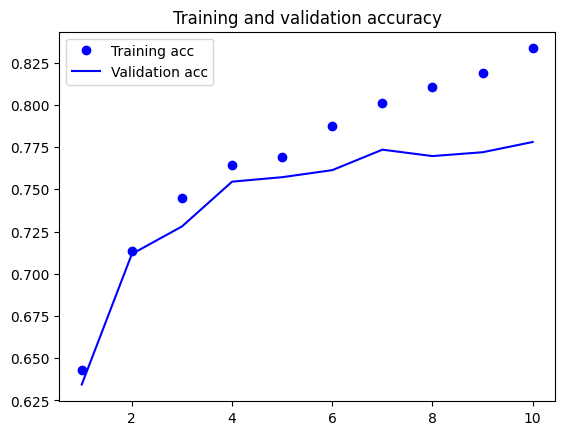

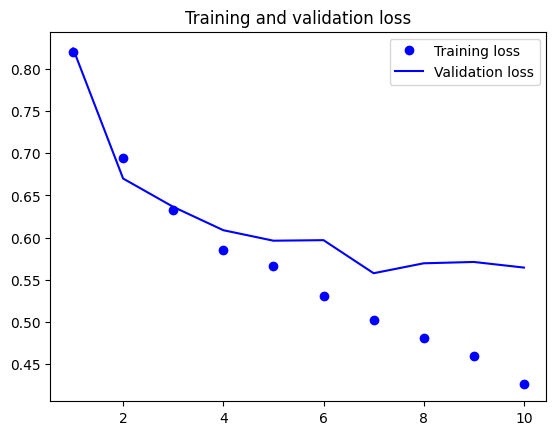

In [117]:
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [118]:
model_globe.evaluate(x_test, y_test)

63/63 [==============================] - 1s 20ms/step - loss: 0.5556 - accuracy: 0.7800


[0.555591881275177, 0.7799999713897705]